# Module 1.5: TensorFlow vs PyTorch - Paradigms and Practice

## Objectives
- Understand the main differences in paradigms between TensorFlow and PyTorch.
- Learn how to implement and train neural networks in both libraries.
- Reference and connect concepts from previous notebooks (perceptron, MLP, backpropagation, optimizers).
- Visualize and compare results using both frameworks.

## TensorFlow vs PyTorch: Paradigm Comparison

| Aspect                | TensorFlow                                 | PyTorch                                   |
|-----------------------|--------------------------------------------|-------------------------------------------|
| Programming Style     | Static graph (define-then-run, v1)         | Dynamic graph (define-by-run)             |
|                       | Eager execution (v2, default)              | Always eager (imperative)                 |
| API Level             | High-level (Keras), low-level ops          | High-level (torch.nn), low-level ops      |
| Model Definition      | Sequential, Functional, Subclassing APIs   | torch.nn.Module classes                   |
| Autograd              | tf.GradientTape (eager), static graph      | torch.autograd (dynamic)                  |
| Deployment            | TensorFlow Serving, TFLite, TFJS           | TorchScript, ONNX, C++                    |
| Community/Docs        | Large, Google-backed                       | Large, Facebook-backed                    |

**Summary:**
- TensorFlow (especially v2) and PyTorch both support eager execution, but PyTorch is more 'pythonic' and dynamic by default.
- Both have high-level APIs for rapid prototyping and low-level APIs for custom work.
- Both support automatic differentiation, GPU acceleration, and deployment tools.

---

## Part 1: Neural Networks with TensorFlow (Keras API)

Let's implement a simple MLP for the XOR problem, referencing the structure and training concepts from previous notebooks.

### TensorFlow: Implementing and Training an MLP for XOR

We will use Keras (the high-level API in TensorFlow) to build and train a multilayer perceptron (MLP) for the XOR problem. This references the MLP and backpropagation concepts from previous notebooks.

**Key concepts:**
- Model: Sequential API, Dense layers
- Activation: Non-linear (sigmoid, relu)
- Loss: Mean squared error (MSE)
- Optimizer: Adam (as discussed in the previous notebook)

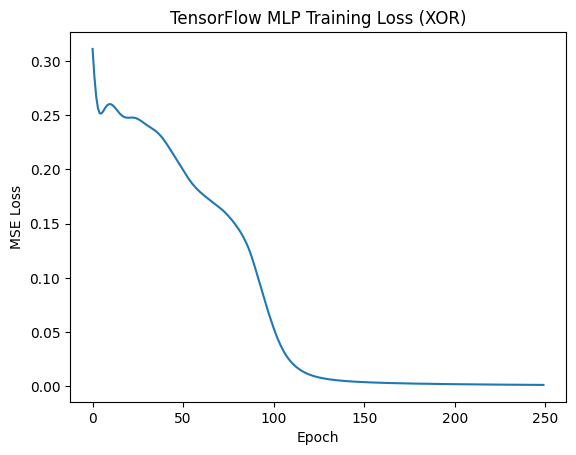

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Input	Predicted
[0. 0.]	0
[0. 1.]	1
[1. 0.]	1
[1. 1.]	0
Input	Predicted
[0. 0.]	0
[0. 1.]	1
[1. 0.]	1
[1. 1.]	0


In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Force TensorFlow to use CPU
# print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
# tf.config.set_visible_devices([], 'GPU')

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y = np.array([[0],[1],[1],[0]], dtype=np.float32)

# Build MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=(2,), activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='mse',
              metrics=['accuracy'])

# Train model
history = model.fit(X, y, epochs=250, verbose=0)

# Plot loss curve
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('TensorFlow MLP Training Loss (XOR)')
plt.show()

# Evaluate and predict
y_pred = model.predict(X) > 0.5
print('Input\tPredicted')
for x, yp in zip(X, y_pred.astype(int)):
    print(f'{x}\t{yp[0]}')

**Result:**
- The TensorFlow MLP learns the XOR function, as shown by the predictions and the decreasing loss curve.
- This demonstrates the power of multilayer perceptrons and the convenience of high-level APIs like Keras.

---

## Part 2: Neural Networks with PyTorch

Now let's implement the same MLP for XOR using PyTorch. We'll reference the same concepts: model structure, activation, loss, optimizer, and training loop.

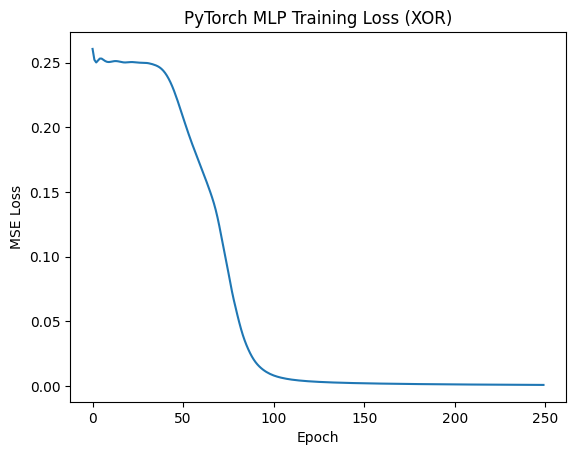

Input	Predicted
[0. 0.]	0
[0. 1.]	1
[1. 0.]	1
[1. 1.]	0


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# XOR dataset
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)

# Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 2)
        self.out = nn.Linear(2, 1)
    def forward(self, x):
        h = torch.sigmoid(self.hidden(x))
        y = torch.sigmoid(self.out(h))
        return y

model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

losses = []
for epoch in range(250):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('PyTorch MLP Training Loss (XOR)')
plt.show()

# Evaluate and predict
with torch.no_grad():
    y_pred = (model(X) > 0.5).int()
print('Input\tPredicted')
for x, yp in zip(X, y_pred):
    print(f'{x.numpy()}\t{yp.item()}')

**Result:**
- The PyTorch MLP also learns the XOR function, with a similar loss curve and predictions as TensorFlow.
- The code structure is more "pythonic" and imperative, with explicit training loops and gradient management.

---

## Final Comparison and Recommendations

- Both TensorFlow and PyTorch can easily implement and train neural networks, including MLPs for problems like XOR.
- TensorFlow (Keras) offers a higher-level, more declarative API, while PyTorch provides more flexibility and a dynamic, pythonic style.
- Both frameworks support automatic differentiation, GPU acceleration, and a wide range of layers and optimizers (see previous notebooks for theory).

**When to use which?**
- Use TensorFlow/Keras for rapid prototyping, production, and deployment (especially with TensorFlow Serving, TFLite, or TFJS).
- Use PyTorch for research, custom models, and when you want more control over the training loop or debugging.

You now have hands-on experience with both major deep learning frameworks and can choose the best tool for your next project!